In [5]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [6]:
Im_Width = 128
Im_Height = 128

In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = (Im_Width,Im_Height)
VALIDATION_SPLIT = 0.1

In [17]:
train_data_dir = r'D:\Cologne\Sample DataSet 2\train'
test_data_dir = r'D:\Cologne\Sample DataSet 2\test'

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=VALIDATION_SPLIT,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=VALIDATION_SPLIT,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 12 files belonging to 2 classes.
Using 11 files for training.
Found 12 files belonging to 2 classes.
Using 1 files for validation.
Found 12 files belonging to 2 classes.


In [18]:
class_names = train_data.class_names
class_names

['defective', 'non-defective']

In [19]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(11, 128, 128, 3)
(11,)


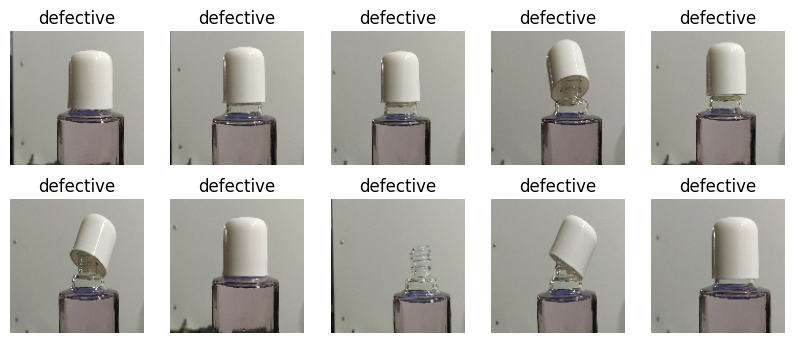

In [20]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [21]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [23]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(Im_Width,Im_Height,3),
                                                           weights="imagenet",
                                                           pooling='max')
for layer in pretrained_model.layers:
        layer.trainable=False

In [25]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(shape=(128, 128, 3)))

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,894,681 (79.71 MB)

 Trainable params: 33,201 (129.69 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [28]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=15,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.9091 - loss: 0.4233 - val_accuracy: 1.0000 - val_loss: 0.2598
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.9091 - loss: 0.3198 - val_accuracy: 1.0000 - val_loss: 0.1066
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9091 - loss: 0.2465 - val_accuracy: 1.0000 - val_loss: 0.0375
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.9091 - loss: 0.2455 - val_accuracy: 1.0000 - val_loss: 0.0170
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.9091 - loss: 0.2447 - val_accuracy: 1.0000 - val_loss: 0.0105
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.9091 - loss: 0.2871 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.9091 - loss: 0.1589 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.9091 - loss: 0.1965 - val_accuracy: 1.0000 - val_loss: 0.

In [ ]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')


Total time for training 9.829 seconds


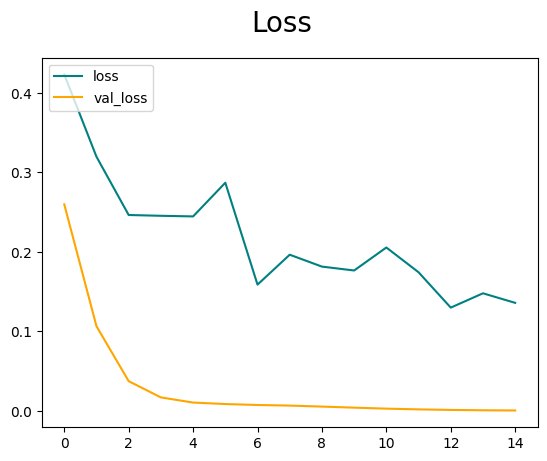

In [32]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

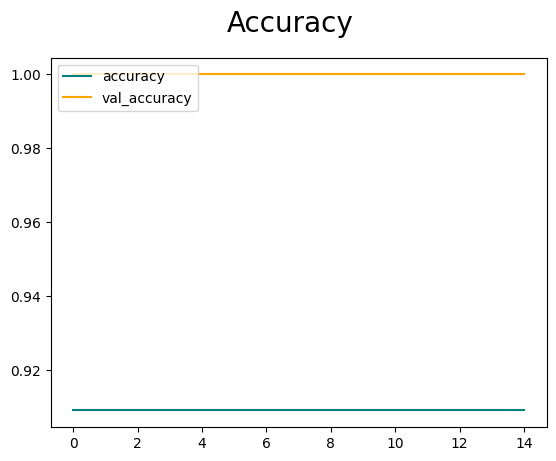

In [33]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [34]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [35]:
precision.result()
recall.result()
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

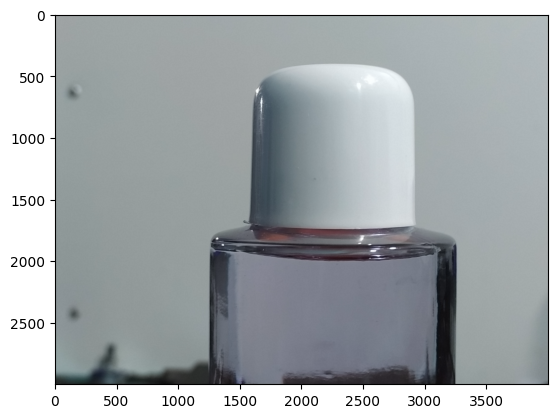

In [37]:
import cv2
img = cv2.imread(r'D:\Cologne\Sample DataSet 1\test\non-defective\IMG_20241212_164351.jpg')
plt.imshow(img)
plt.show()

In [38]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [39]:
scaled_image.shape

TensorShape([128, 128, 3])

In [40]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [41]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step


In [42]:
yhat

array([[0.3820963]], dtype=float32)

In [43]:
class_names

['defective', 'non-defective']

In [44]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

defective


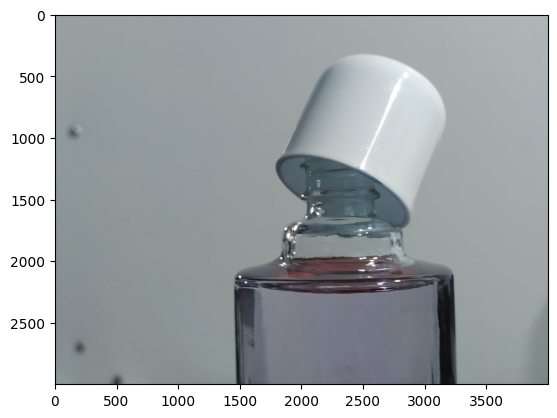

In [45]:
img = cv2.imread(r'D:\Cologne\Sample DataSet 1\test\defective\IMG_20241212_164530.jpg')
plt.imshow(img)
plt.show()

In [46]:
resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

scaled_image.shape

TensorShape([128, 128, 3])

In [47]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [48]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [49]:
yhat

array([[0.00018587]], dtype=float32)

In [50]:
class_names

['defective', 'non-defective']

In [51]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')

defective


In [52]:
model.save('my_model_1.1.keras') # saves the model in h5 format
